In [1]:
pip install gudhi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 11.0 MB/s eta 0:00:00


In [2]:
import gudhi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.spatial.distance import squareform, pdist
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

              a         b
Point                    
P1    -0.062332 -0.990463
P2     1.109356 -0.077222
P3     0.553080 -0.938321
P4     0.290183  0.813677
P5    -0.722770 -0.380330
...         ...       ...
P96    0.941756 -0.420209
P97   -1.094436 -0.256210
P98    0.892490 -0.445924
P99   -0.290220  0.867121
P100   0.096652 -1.144156

[100 rows x 2 columns]


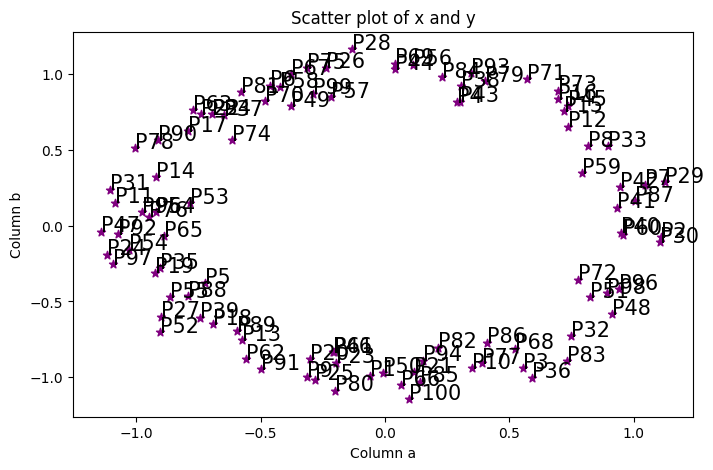

In [21]:
csv1 = pd.read_csv('Activity1.csv')

csv1.columns = ['a', 'b']

point = ['P{}'.format(i) for i in range(1, len(csv1) + 1)]

data1 = pd.DataFrame({'Point': point, 'a': csv1['a'], 'b': csv1['b']})
data1 = data1.set_index('Point')

print(data1)

plt.figure(figsize=(8,5))
plt.scatter(data1['a'], data1['b'], c='purple', marker='*')
plt.xlabel('Column a')
plt.ylabel('Column b')
plt.title('Scatter plot of x and y')

for j in data1.itertuples():
    plt.annotate(j.Index, (j.a, j.b), fontsize=15)

plt.show()

In [4]:
#Matriz de distancias euclidianas
dist = pd.DataFrame(squareform(pdist(data1[['a', 'b']]), 'euclidean'), columns=data1.index.values, index=data1.index.values)
dist

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100
P1,0.000000,1.485551,0.617617,1.838258,0.899133,1.953101,1.675884,1.746904,0.251628,0.415931,...,0.439108,1.377628,2.035153,0.238751,1.412562,1.154722,1.266636,1.099185,1.871510,0.221128
P2,1.485551,0.000000,1.025151,1.210266,1.857029,1.861869,0.350995,0.666535,1.693717,1.148452,...,1.828640,2.183543,1.324574,1.253893,2.092554,0.381746,2.211048,0.427753,1.688370,1.471026
P3,0.617617,1.025151,0.000000,1.771613,1.392533,2.118670,1.302420,1.482042,0.868867,0.202658,...,1.052383,1.851240,1.953305,0.402207,1.841215,0.647695,1.783139,0.598041,1.992680,0.500694
P4,1.838258,1.210266,1.771613,0.000000,1.565799,0.759963,0.931277,0.600631,1.907239,1.753888,...,1.929427,1.617595,0.197498,1.708330,1.461027,1.395358,1.749808,1.396198,0.582859,1.967375
P5,0.899133,1.857029,1.392533,1.565799,0.000000,1.327453,1.882518,1.781682,0.738533,1.209981,...,0.609013,0.478495,1.747378,1.013645,0.531153,1.665004,0.391843,1.616591,1.320315,1.120216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P96,1.154722,0.381746,0.647695,1.395358,1.665004,1.941771,0.695625,0.949291,1.381125,0.786766,...,1.534243,2.048568,1.544391,0.916899,1.984259,0.000000,2.042786,0.055574,1.781848,1.112789
P97,1.266636,2.211048,1.783139,1.749808,0.391843,1.336528,2.202346,2.060810,1.074972,1.598143,...,0.911705,0.201778,1.912102,1.399637,0.361985,2.042786,0.000000,1.995962,1.381533,1.485644
P98,1.099185,0.427753,0.598041,1.396198,1.616591,1.924638,0.729730,0.969574,1.325628,0.732893,...,1.479161,2.004957,1.550017,0.861417,1.943547,0.055574,1.995962,0.000000,1.767170,1.058718
P99,1.871510,1.688370,1.992680,0.582859,1.320315,0.180234,1.463273,1.157728,1.862635,1.916541,...,1.825976,1.210617,0.648617,1.811605,1.039881,1.781848,1.381533,1.767170,0.000000,2.048146


In [5]:
points = csv1[['a', 'b']].values.tolist()

# Crear el complejo
rips_complex = gudhi.RipsComplex(points=points, max_edge_length=20)

In [6]:
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + '-' + \
  repr(simplex_tree.num_simplices()) + 'simplices - ' + \
  repr(simplex_tree.num_vertices()) + 'vertices.'

print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
  print(fmt % tuple(filtered_value))

Se han truncado las últimas 5000 líneas del flujo de salida.
[51, 66, 99] -> 2.19
[52, 66, 99] -> 2.19
[53, 66, 99] -> 2.19
[54, 66, 99] -> 2.19
[56, 66, 99] -> 2.19
[57, 66, 99] -> 2.19
[58, 66, 99] -> 2.19
[59, 66, 99] -> 2.19
[60, 66, 99] -> 2.19
[61, 66, 99] -> 2.19
[62, 66, 99] -> 2.19
[63, 66, 99] -> 2.19
[64, 66, 99] -> 2.19
[65, 66, 99] -> 2.19
[66, 67, 99] -> 2.19
[66, 69, 99] -> 2.19
[66, 70, 99] -> 2.19
[66, 71, 99] -> 2.19
[66, 72, 99] -> 2.19
[66, 73, 99] -> 2.19
[66, 75, 99] -> 2.19
[66, 76, 99] -> 2.19
[66, 77, 99] -> 2.19
[66, 78, 99] -> 2.19
[66, 79, 99] -> 2.19
[66, 80, 99] -> 2.19
[66, 81, 99] -> 2.19
[66, 82, 99] -> 2.19
[66, 83, 99] -> 2.19
[66, 84, 99] -> 2.19
[66, 85, 99] -> 2.19
[66, 86, 99] -> 2.19
[66, 87, 99] -> 2.19
[66, 88, 99] -> 2.19
[66, 89, 99] -> 2.19
[66, 90, 99] -> 2.19
[66, 91, 99] -> 2.19
[66, 92, 99] -> 2.19
[66, 93, 99] -> 2.19
[66, 94, 99] -> 2.19
[66, 95, 99] -> 2.19
[66, 96, 99] -> 2.19
[66, 97, 99] -> 2.19
[66, 98, 99] -> 2.19
[82, 89] -> 2.1

In [23]:
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

def plot_rips_complex(data1, R, label="data", col=10, maxdim=2):
    tab10 = cm.get_cmap('tab10')

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(label)
    ax.scatter(
        data1[:, 0], data1[:, 1], label=label,
        s=8, alpha=0.9, c=np.array(tab10([col] * len(data1)))
    )

    for xy in data1:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    for i, xy in enumerate(data1):
        if maxdim >=1:
            for j in range(i + 1, len(data1)):
                pq = data1[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=0.6, linewidth=1)
                if maxdim == 2:
                    for k in range(j + 1, len(data1)):
                        ab = data1[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)
                        ):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.1)
                        pass

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass


<ipython-input-23-614038dad401>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


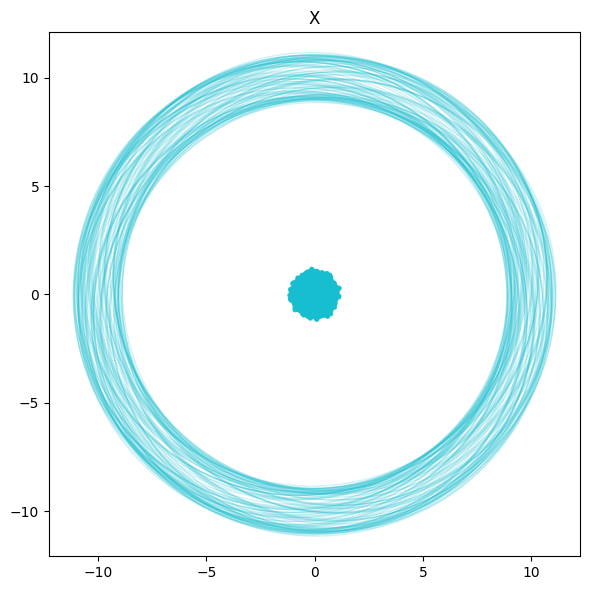

In [25]:
X = np.array(points)
plot_rips_complex(X, R=10, label='X', maxdim=1)

## Act CSV 2

              a         b
Point                    
P1     1.727350  0.285771
P2     1.861161  0.597764
P3     0.627520  1.497373
P4     0.979559  0.008873
P5     0.756204  0.536461
...         ...       ...
P96    0.803505  0.056748
P97    0.793846 -0.350394
P98    1.372076 -0.313612
P99    0.730844 -0.348970
P100   1.028700  1.126591

[100 rows x 2 columns]


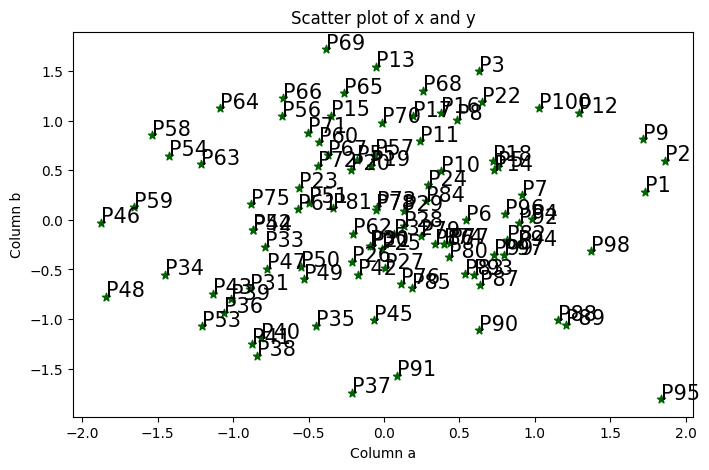

In [26]:
csv2 = pd.read_csv('Activity2.csv')

csv2.columns = ['a', 'b']

point = ['P{}'.format(i) for i in range(1, len(csv2) + 1)]

data2 = pd.DataFrame({'Point': point, 'a': csv2['a'], 'b': csv2['b']})
data2 = data2.set_index('Point')

print(data2)

plt.figure(figsize=(8,5))
plt.scatter(data2['a'], data2['b'], c='darkgreen', marker='*')
plt.xlabel('Column a')
plt.ylabel('Column b')
plt.title('Scatter plot of x and y')

for j in data2.itertuples():
    plt.annotate(j.Index, (j.a, j.b), fontsize=15)

plt.show()

In [10]:
#Matriz de distancias euclidianas
dist2 = pd.DataFrame(squareform(pdist(data2[['a', 'b']]), 'euclidean'), columns=data2.index.values, index=data2.index.values)
dist2

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100
P1,0.000000,0.339478,1.636339,0.797410,1.002980,1.219369,0.811375,1.438593,0.527756,1.363058,...,2.477545,0.887711,1.408473,0.997360,2.097195,0.951810,1.129662,0.696764,1.181491,1.093202
P2,0.339478,0.000000,1.526815,1.060195,1.106656,1.448557,1.006970,1.436712,0.257549,1.484403,...,2.802076,1.150206,1.710089,1.292399,2.406674,1.187996,1.427643,1.034317,1.474422,0.986229
P3,1.636339,1.526815,0.000000,1.529563,0.969490,1.500964,1.282340,0.505953,1.289271,1.032942,...,3.117014,1.552354,2.048693,1.768501,3.519124,1.451334,1.855237,1.958068,1.849232,0.546283
P4,0.797410,1.060195,1.529563,0.000000,0.572920,0.437453,0.247309,1.118052,1.093768,0.771242,...,1.815111,0.090732,0.679593,0.276629,2.008119,0.182448,0.404428,0.508002,0.435788,1.118798
P5,1.002980,1.106656,0.969490,0.572920,0.000000,0.578646,0.330091,0.547060,1.003258,0.378188,...,2.212235,0.585148,1.099481,0.799231,2.580706,0.482039,0.887653,1.049725,0.885795,0.650006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P96,0.951810,1.187996,1.451334,0.182448,0.482039,0.267624,0.222402,1.006628,1.188887,0.608789,...,1.779270,0.129212,0.642757,0.319869,2.130836,0.000000,0.407256,0.678557,0.412173,1.093287
P97,1.129662,1.427643,1.855237,0.404428,0.887653,0.430435,0.611002,1.396670,1.487689,0.940590,...,1.411014,0.335800,0.282901,0.135784,1.790857,0.407256,0.000000,0.579399,0.063017,1.495541
P98,0.696764,1.034317,1.958068,0.508002,1.049725,0.886724,0.723014,1.594645,1.179709,1.279237,...,1.797680,0.551678,0.813094,0.488632,1.564646,0.678557,0.579399,0.000000,0.642206,1.480571
P99,1.181491,1.474422,1.849232,0.435788,0.885795,0.395659,0.625372,1.382720,1.526641,0.913332,...,1.381885,0.359121,0.243820,0.184147,1.829278,0.412173,0.063017,0.642206,0.000000,1.505324


In [11]:
points2 = csv2[['a', 'b']].values.tolist()

# Crear el complejo
rips_complex = gudhi.RipsComplex(points=points2, max_edge_length=20)

In [12]:
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + '-' + \
  repr(simplex_tree.num_simplices()) + 'simplices - ' + \
  repr(simplex_tree.num_vertices()) + 'vertices.'

print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
  print(fmt % tuple(filtered_value))

Se han truncado las últimas 5000 líneas del flujo de salida.
[8, 35, 72] -> 3.28
[8, 35, 73] -> 3.28
[8, 35, 74] -> 3.28
[8, 35, 75] -> 3.28
[8, 35, 76] -> 3.28
[8, 35, 77] -> 3.28
[8, 35, 78] -> 3.28
[8, 35, 79] -> 3.28
[8, 35, 80] -> 3.28
[8, 35, 81] -> 3.28
[8, 35, 82] -> 3.28
[8, 35, 83] -> 3.28
[8, 35, 84] -> 3.28
[8, 35, 85] -> 3.28
[8, 35, 86] -> 3.28
[8, 35, 87] -> 3.28
[8, 35, 88] -> 3.28
[8, 35, 89] -> 3.28
[8, 35, 90] -> 3.28
[8, 35, 91] -> 3.28
[8, 35, 92] -> 3.28
[8, 35, 93] -> 3.28
[8, 35, 94] -> 3.28
[8, 35, 95] -> 3.28
[8, 35, 96] -> 3.28
[8, 35, 97] -> 3.28
[8, 35, 98] -> 3.28
[8, 35, 99] -> 3.28
[0, 33] -> 3.28
[0, 2, 33] -> 3.28
[0, 3, 33] -> 3.28
[0, 4, 33] -> 3.28
[0, 5, 33] -> 3.28
[0, 6, 33] -> 3.28
[0, 7, 33] -> 3.28
[0, 9, 33] -> 3.28
[0, 10, 33] -> 3.28
[0, 11, 33] -> 3.28
[0, 12, 33] -> 3.28
[0, 13, 33] -> 3.28
[0, 14, 33] -> 3.28
[0, 15, 33] -> 3.28
[0, 16, 33] -> 3.28
[0, 17, 33] -> 3.28
[0, 18, 33] -> 3.28
[0, 19, 33] -> 3.28
[0, 20, 33] -> 3.28
[0, 21, 33

In [36]:
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

def plot_rips_complex(data2, R, label="data", col=2, maxdim=2):
    tab10 = cm.get_cmap('tab10')

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(label)
    ax.scatter(
        data2[:, 0], data2[:, 1], label=label,
        s=8, alpha=0.9, c=np.array(tab10([col] * len(data2)))
    )

    for xy in data2:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    for i, xy in enumerate(data2):
        if maxdim >=1:
            for j in range(i + 1, len(data2)):
                pq = data2[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=0.6, linewidth=1)
                if maxdim == 2:
                    for k in range(j + 1, len(data2)):
                        ab = data2[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)
                        ):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.1)
                        pass

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass


<ipython-input-36-31148d628093>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


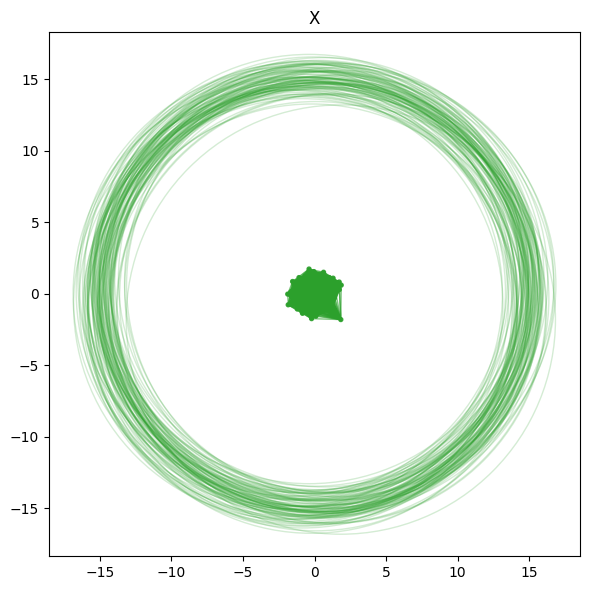

In [38]:
X = np.array(points2)
plot_rips_complex(X, R=15, label='X', maxdim=1)

## Act CSV 3

               a          b
Point                      
P1    -16.865905  -9.030913
P2    -17.721247   9.601550
P3    -19.047260   8.233957
P4    -10.252216  -8.925738
P5    -17.636004 -10.591064
...          ...        ...
P96    -4.374102  -2.763981
P97     0.835126  -0.332593
P98     3.035755  -1.229515
P99     3.306197  -2.045879
P100   -4.613019  -2.941189

[100 rows x 2 columns]


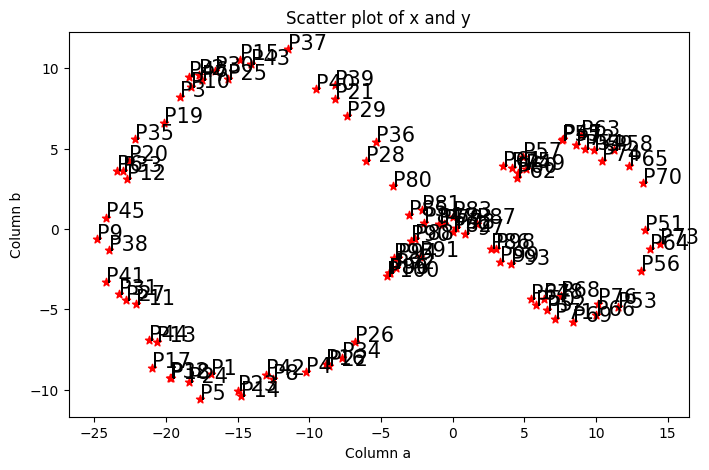

In [39]:
csv3 = pd.read_csv('Activity3.csv')

csv3.columns = ['a', 'b']

point = ['P{}'.format(i) for i in range(1, len(csv3) + 1)]

data3 = pd.DataFrame({'Point': point, 'a': csv3['a'], 'b': csv3['b']})
data3 = data3.set_index('Point')

print(data3)

plt.figure(figsize=(8,5))
plt.scatter(data3['a'], data3['b'], c='red', marker='*')
plt.xlabel('Column a')
plt.ylabel('Column b')
plt.title('Scatter plot of x and y')

for j in data3.itertuples():
    plt.annotate(j.Index, (j.a, j.b), fontsize=15)

plt.show()

In [16]:
#Matriz de distancias euclidianas
dist3 = pd.DataFrame(squareform(pdist(data3[['a', 'b']]), 'euclidean'), columns=data3.index.values, index=data3.index.values)
dist3

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100
P1,0.000000,18.652085,17.402128,6.614525,1.739863,14.260669,18.306369,4.321607,11.569415,17.888074,...,16.290179,14.500682,22.001171,14.930703,14.691244,13.975678,19.722760,21.376105,21.347234,13.682761
P2,18.652085,0.000000,1.904894,19.976156,20.192793,8.254895,0.390541,19.634802,12.484377,0.957017,...,19.133768,18.310447,24.743488,18.032438,17.792009,18.194851,21.048187,23.412926,24.037804,18.142380
P3,17.402128,1.904894,0.000000,19.282322,18.877845,6.350069,1.837290,18.736088,10.609183,0.980201,...,19.483963,18.505823,25.325247,18.288663,18.032462,18.337289,21.649366,24.025338,24.603904,18.254622
P4,6.614525,19.976156,19.282322,0.000000,7.569256,18.198738,19.589601,2.340488,16.773912,19.449567,...,10.722151,9.037785,15.806096,9.596807,9.424855,8.515836,14.027518,15.355846,15.204046,8.222856
P5,1.739863,20.192793,18.877845,7.569256,0.000000,15.356038,19.854937,5.231932,12.277479,19.404334,...,17.708982,15.928539,23.252298,16.387453,16.158448,15.399392,21.128626,22.692734,22.618487,15.103600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P96,13.975678,18.194851,18.337289,8.515836,15.399392,20.094638,17.821981,10.497571,20.578130,18.064780,...,2.314504,0.531008,8.434551,1.099036,1.000292,0.000000,5.748713,7.567071,7.713798,0.297463
P97,19.722760,21.048187,21.649366,14.027518,21.128626,24.580517,20.717177,16.139055,25.680663,21.158790,...,3.435578,5.227321,3.696745,4.856351,5.124293,5.748713,0.000000,2.376392,3.006916,6.040451
P98,21.376105,23.412926,24.025338,15.355846,22.692734,26.902236,23.084039,17.575301,27.885291,23.531406,...,5.362697,7.084174,1.379394,6.844837,7.130859,7.567071,2.376392,0.000000,0.859994,7.837957
P99,21.347234,24.037804,24.603904,15.204046,22.618487,27.326176,23.703715,17.459071,28.184245,24.132154,...,5.618672,7.259213,0.745004,7.091216,7.381338,7.713798,3.006916,0.859994,0.000000,7.969665


In [17]:
points3 = csv3[['a', 'b']].values.tolist()

# Crear el complejo
rips_complex = gudhi.RipsComplex(points=points3, max_edge_length=20)

In [18]:
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + '-' + \
  repr(simplex_tree.num_simplices()) + 'simplices - ' + \
  repr(simplex_tree.num_vertices()) + 'vertices.'

print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
  print(fmt % tuple(filtered_value))

Se han truncado las últimas 5000 líneas del flujo de salida.
[11, 27, 40] -> 19.62
[12, 27, 40] -> 19.62
[13, 27, 40] -> 19.62
[14, 27, 40] -> 19.62
[15, 27, 40] -> 19.62
[17, 27, 40] -> 19.62
[18, 27, 40] -> 19.62
[19, 27, 40] -> 19.62
[21, 27, 40] -> 19.62
[22, 27, 40] -> 19.62
[23, 27, 40] -> 19.62
[24, 27, 40] -> 19.62
[25, 27, 40] -> 19.62
[26, 27, 40] -> 19.62
[27, 29, 40] -> 19.62
[27, 30, 40] -> 19.62
[27, 31, 40] -> 19.62
[27, 32, 40] -> 19.62
[27, 33, 40] -> 19.62
[27, 34, 40] -> 19.62
[27, 36, 40] -> 19.62
[27, 37, 40] -> 19.62
[27, 39, 40] -> 19.62
[27, 40, 41] -> 19.62
[27, 40, 42] -> 19.62
[27, 40, 43] -> 19.62
[27, 40, 44] -> 19.62
[27, 40, 45] -> 19.62
[27, 40, 99] -> 19.62
[31, 79] -> 19.62
[0, 31, 79] -> 19.62
[1, 31, 79] -> 19.62
[2, 31, 79] -> 19.62
[3, 31, 79] -> 19.62
[4, 31, 79] -> 19.62
[5, 31, 79] -> 19.62
[6, 31, 79] -> 19.62
[7, 31, 79] -> 19.62
[9, 31, 79] -> 19.62
[10, 31, 79] -> 19.62
[11, 31, 79] -> 19.62
[12, 31, 79] -> 19.62
[13, 31, 79] -> 19.62
[15, 3

In [41]:
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

def plot_rips_complex(data3, R, label="data", col=6, maxdim=2):
    tab10 = cm.get_cmap('tab10')

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title(label)
    ax.scatter(
        data3[:, 0], data3[:, 1], label=label,
        s=8, alpha=0.9, c=np.array(tab10([col] * len(data3)))
    )

    for xy in data3:
        ax.add_patch(mpatches.Circle(xy, radius=R, fc='none', ec=tab10(col), alpha=0.2))

    for i, xy in enumerate(data3):
        if maxdim >=1:
            for j in range(i + 1, len(data3)):
                pq = data3[j]
                if (xy != pq).all() and (np.linalg.norm(xy - pq) <= R):
                    pts = np.array([xy, pq])
                    ax.plot(pts[:, 0], pts[:, 1], color=tab10(col), alpha=0.6, linewidth=1)
                if maxdim == 2:
                    for k in range(j + 1, len(data3)):
                        ab = data3[k]
                        if ((ab != pq).all()
                                and (np.linalg.norm(xy - pq) <= R)
                                and (np.linalg.norm(xy - ab) <= R)
                                and (np.linalg.norm(pq - ab) <= R)
                        ):
                            pts = np.array([xy, pq, ab])
                            ax.fill(pts[:, 0], pts[:, 1], facecolor=tab10(col), alpha=0.1)
                        pass

    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    pass

<ipython-input-41-f55184d87112>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab10 = cm.get_cmap('tab10')


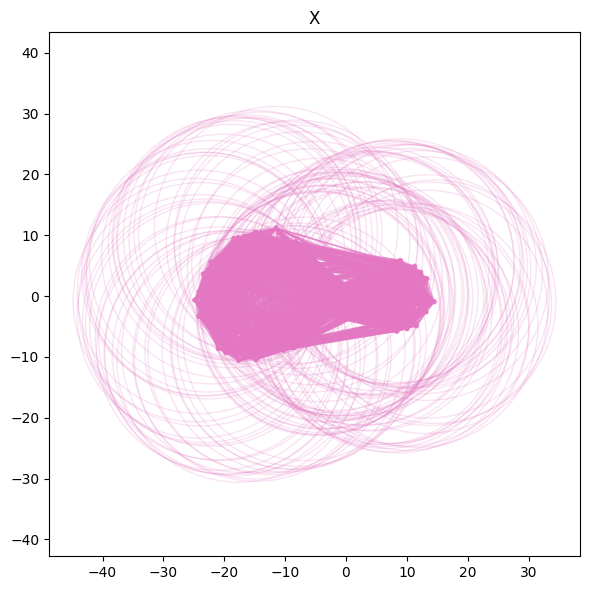

In [42]:
X = np.array(points3)
plot_rips_complex(X, R=20, label='X', maxdim=1)